# <a id='toc1_'></a>[第3章 变量分布图](#toc0_)


**本文目录**<a id='toc0_'></a>    
- [第3章 变量分布图](#toc1_)    
  - [3.1 直方图](#toc1_1_)    
  - [3.2 密度图](#toc1_2_)    
  - [3.3 常用函数封装](#toc1_3_)    
    - [3.3.1 单变量分布图](#toc1_3_1_)    
    - [3.3.2 多变量分布图](#toc1_3_2_)    
  - [参考资料：<br>](#toc1_4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->


## <a id='toc1_1_'></a>[3.1 直方图](#toc0_)
这里以经典的鸢尾花（iris）数据集为例，展示Seaborn、Proplot以及SciencePlots的直方图。

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import proplot as pplt
import scienceplots

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size']   = 14

In [2]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


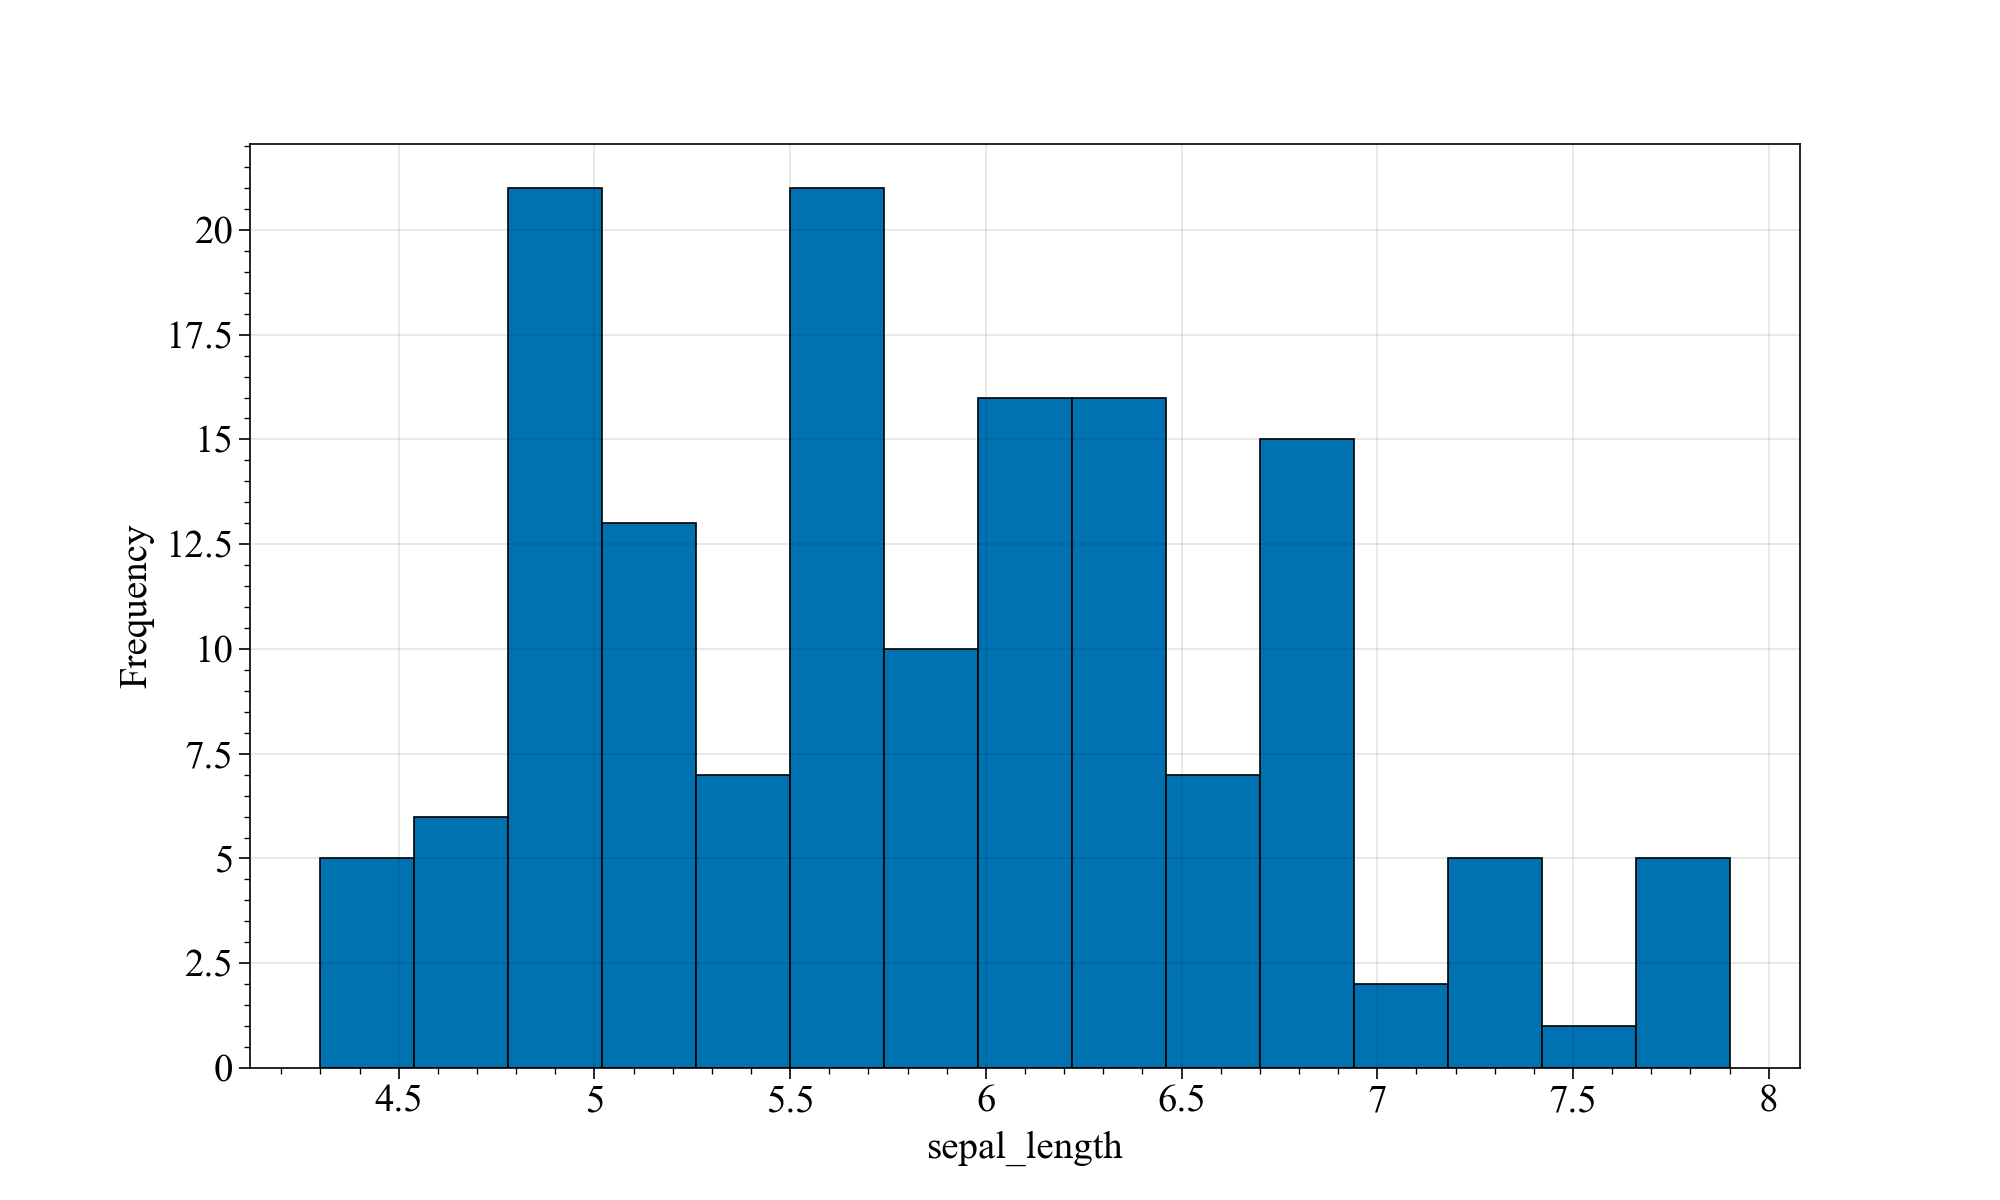

In [3]:
plt.figure(figsize=(10,6), dpi=100, facecolor="w")

plt.hist(iris["sepal_length"], bins=15, edgecolor='black')
plt.xlabel("sepal_length")
plt.ylabel("Frequency")

plt.savefig('./images/Hist_matplotlib.png', dpi=300, bbox_inches='tight')
plt.show()

x轴为鸢尾花的萼片（sepal）长度，y轴为不同萼片长度范围内的鸢尾花的数量。

matplotlib能画个基本的直方图，但不够优雅~ 

接下来我们来试试Seaborn，这个可就有意思多了。

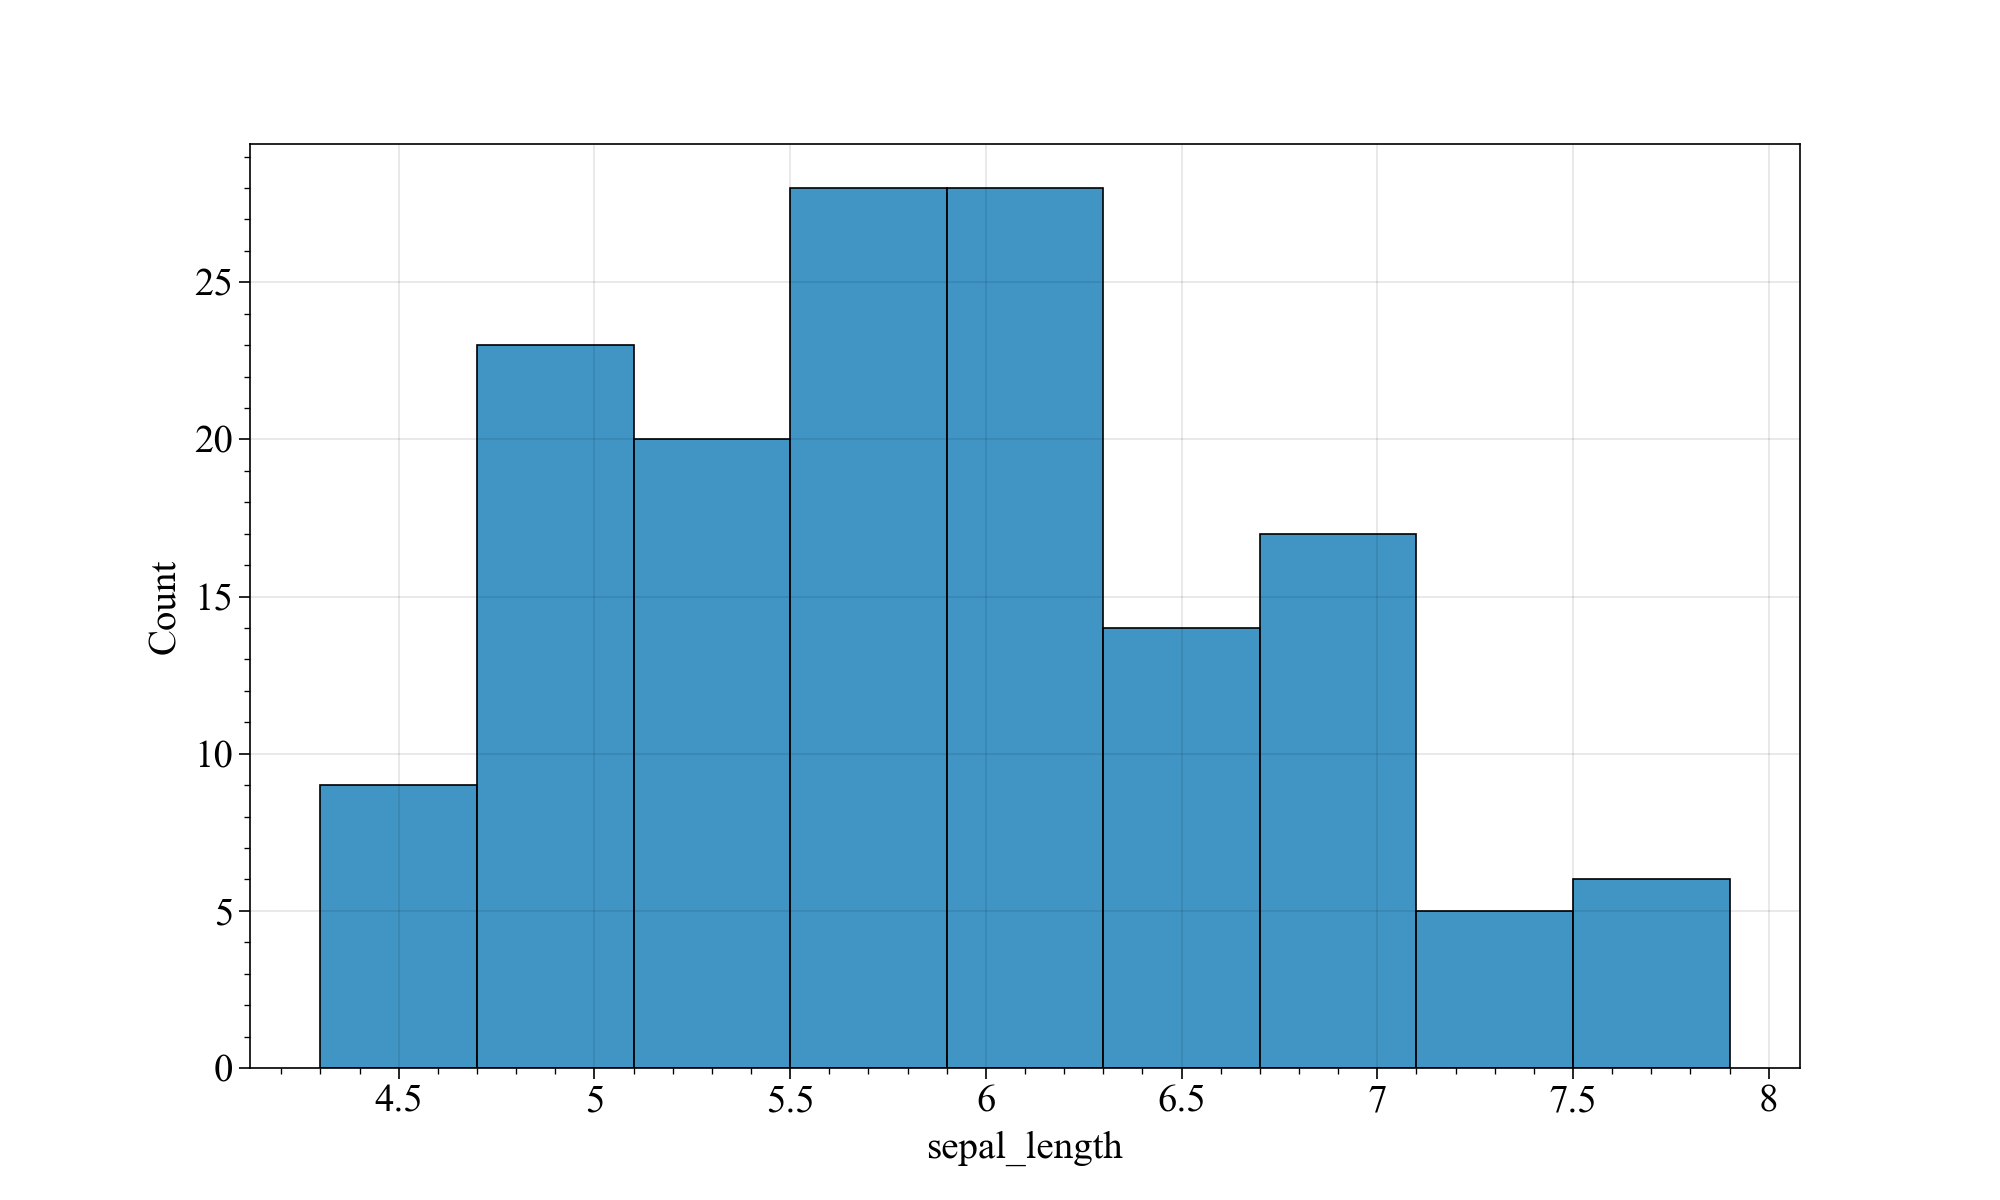

In [4]:
plt.figure(figsize=(10,6),dpi=100,facecolor="w")
sns.histplot(data=iris, x="sepal_length")

plt.savefig('./images/Hist_seaborn_original.png', dpi=300, bbox_inches='tight')
plt.show()

相当原始，和matplotlib一样，不够优雅。我们给他加点魔法(核密度估计曲线kde)：

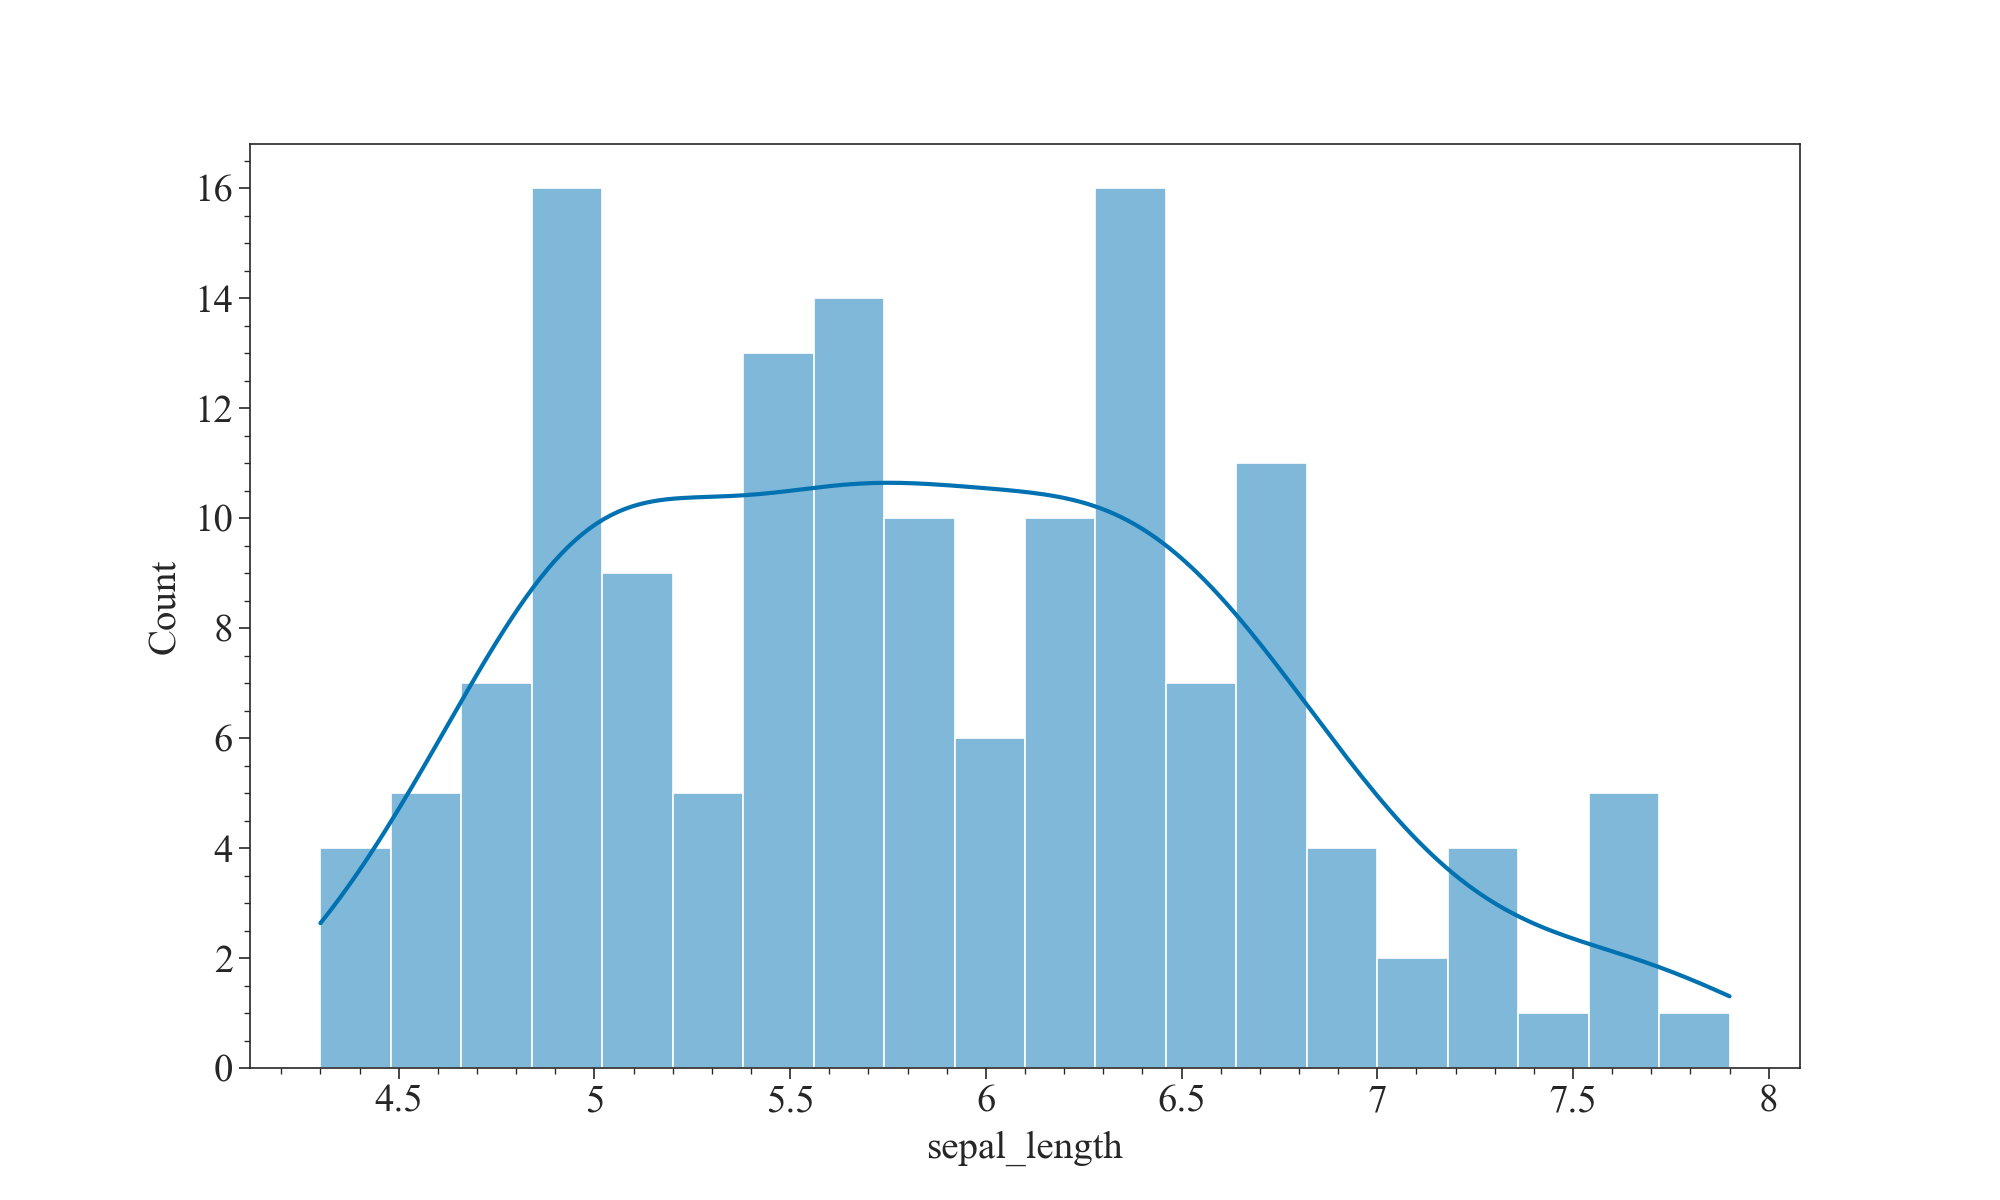

In [5]:
# 设置seaborn风格
custom_params = {"font.family"   : "Times New Roman", "font.scale": 1.5}
sns.set_style(style="ticks", rc=custom_params) #设置绘图风格

plt.figure(figsize=(10,6),dpi=100,facecolor="w")
sns.histplot(data=iris, x="sepal_length", bins=20, kde=True)

plt.savefig('./images/Hist_seaborn_kde.png', dpi=300, bbox_inches='tight')
plt.show()

还可以分组查看萼片的长度分布情况：

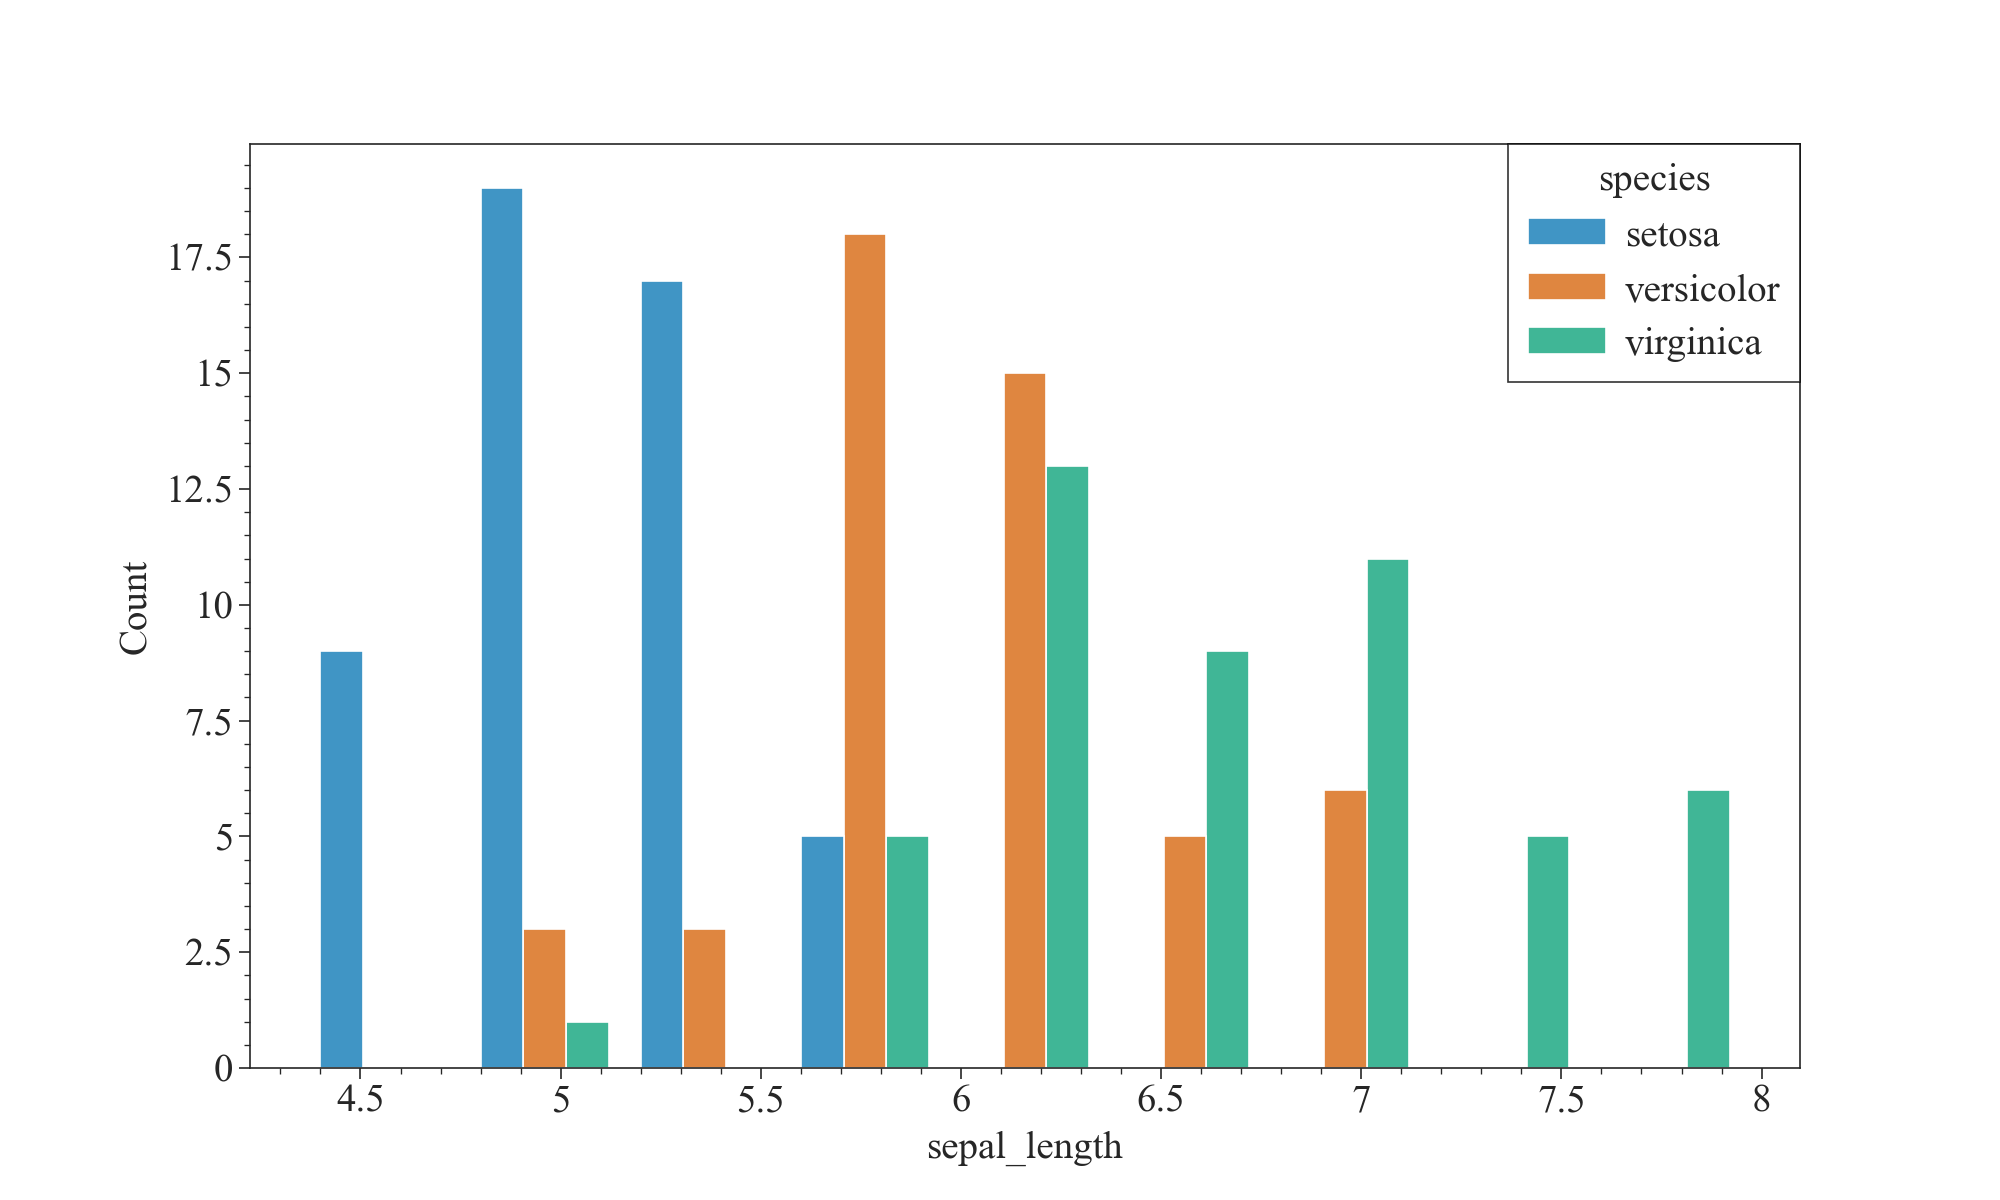

In [6]:
plt.figure(figsize=(10,6),dpi=100,facecolor="w")
sns.histplot(data=iris, x="sepal_length", hue='species', multiple='dodge', shrink=.8)

plt.savefig('./images/Hist_seaborn_group.png', dpi=300, bbox_inches='tight')
plt.show()

如上图，我们可以发现，山鸢尾花（setosa）的萼片长度比其他两种要短，杂色鸢尾花（Versicolor）的萼片长度适中，维吉尼亚鸢尾花（Virginica）的萼片长度普遍更长。这也是分辨鸢尾花种类的一个重要特征。

咳咳，扯远了，来看看Proplot的直方图：

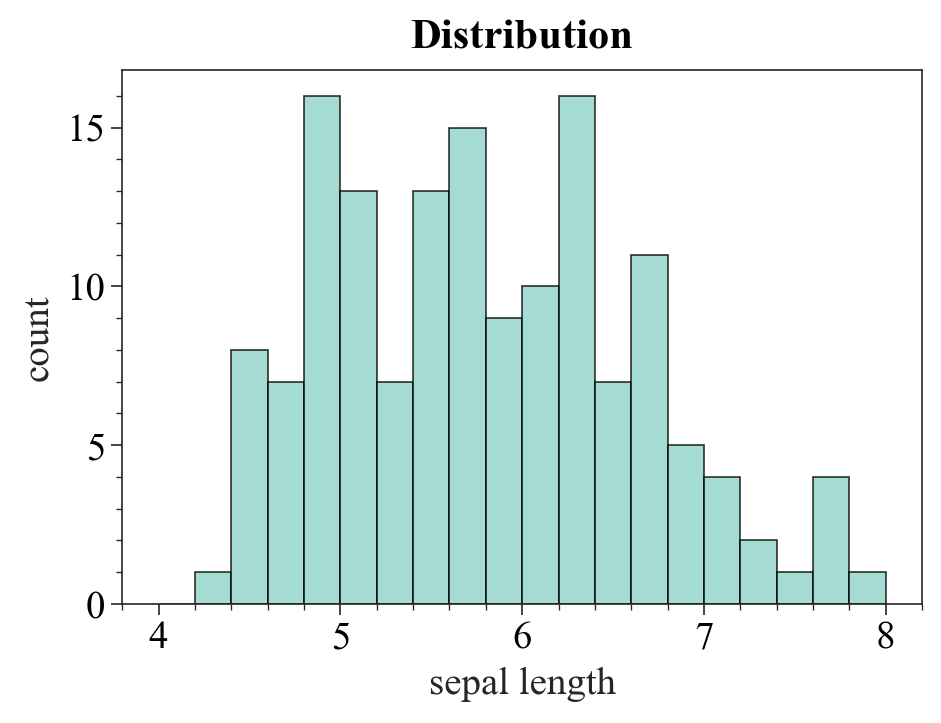

In [7]:
fig, ax = pplt.subplots(refwidth=4, refaspect=(3, 2))
ax.format(suptitle='Distribution', xlabel='sepal length', ylabel='count')
res = ax.hist(
    iris['sepal_length'], pplt.arange(4, 8, 0.2), filled=True, alpha=0.8, edgecolor='k', 
            histtype='bar', cycle='Set3')

plt.savefig('./images/_histplot_group.png', dpi=300, bbox_inches='tight')
plt.show()

emmmm，挺素的。下一位：SciencePlots

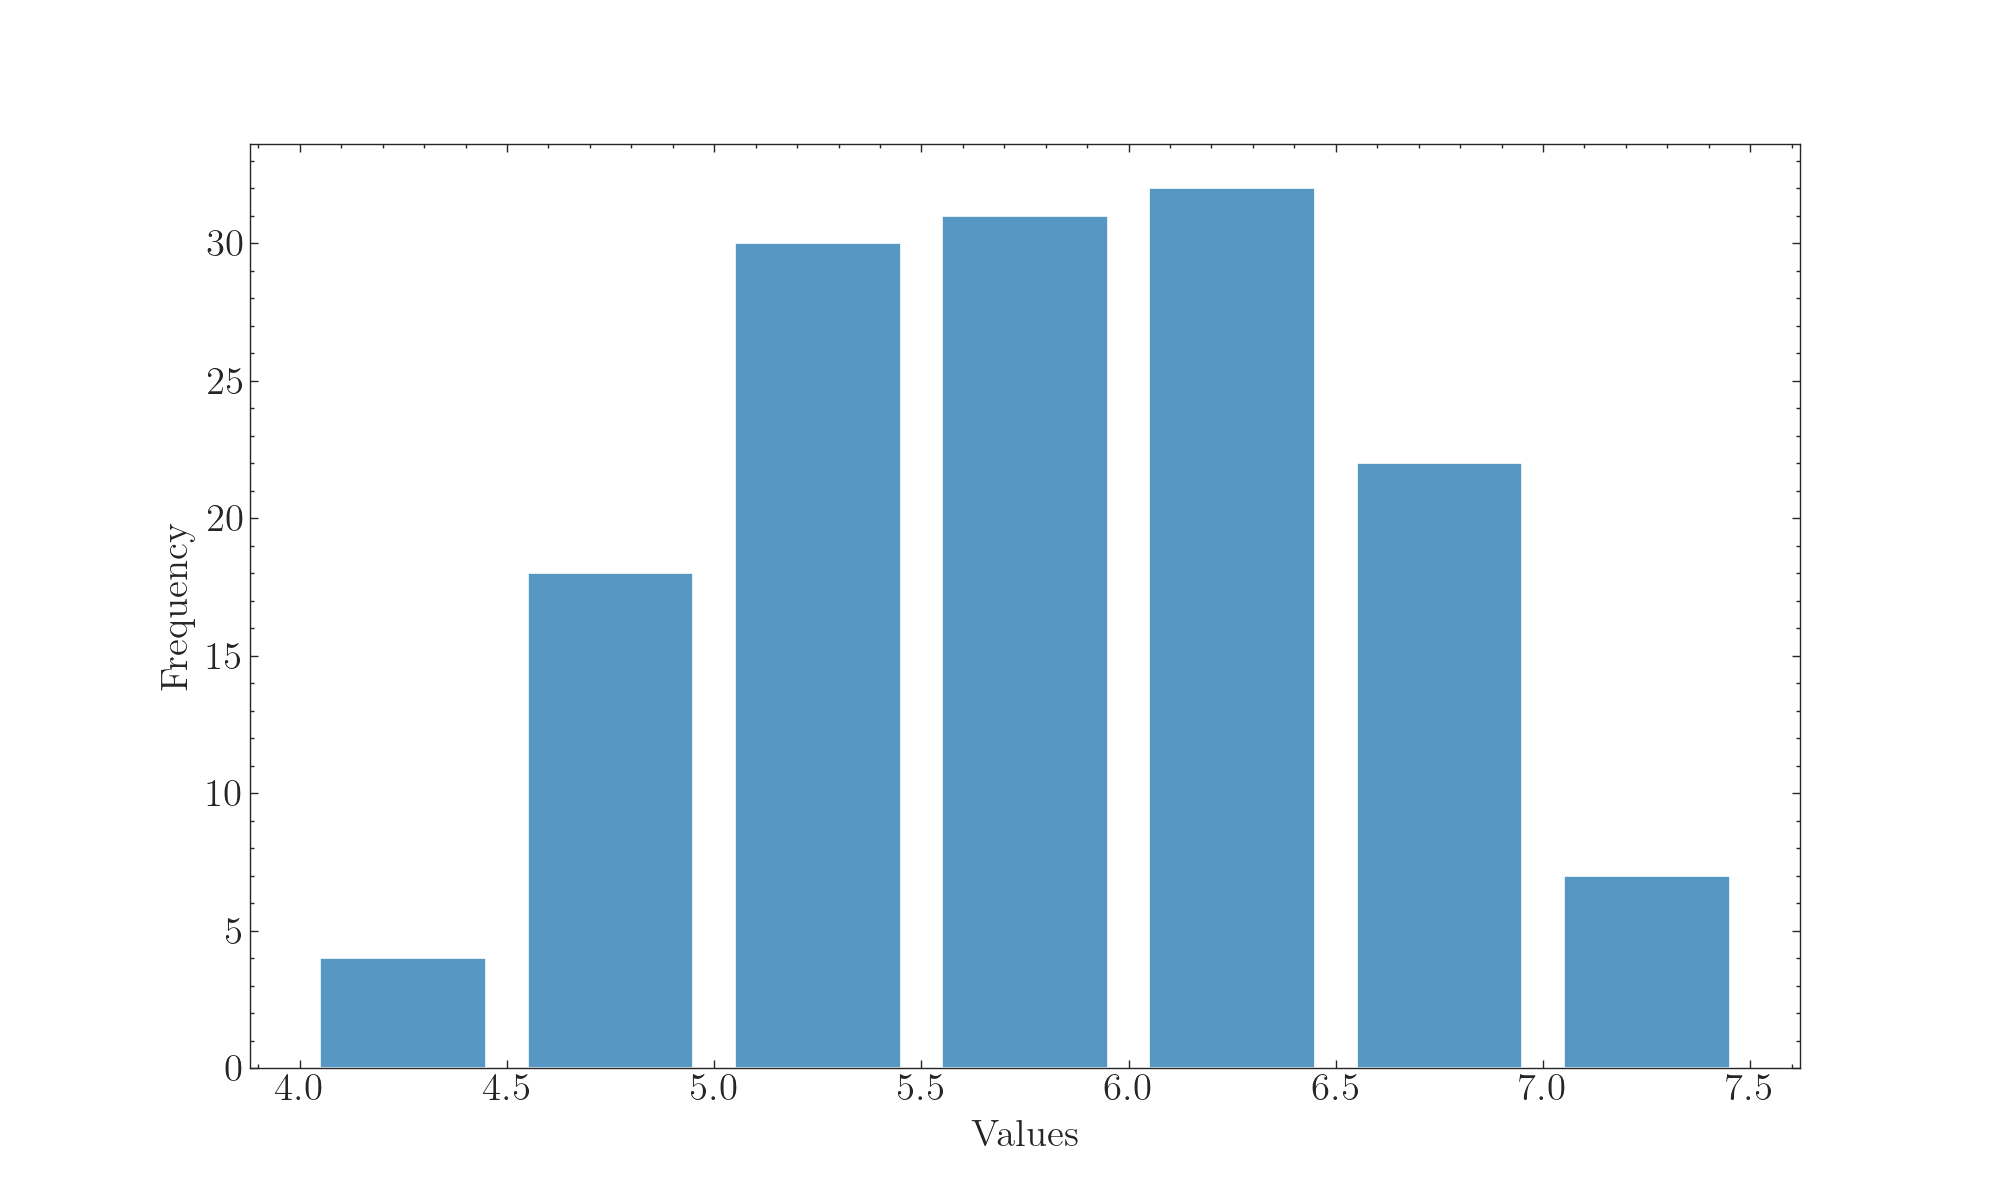

In [8]:
bins = np.arange(4,8,0.5)
with plt.style.context(['science']):
    fig,ax = plt.subplots(figsize=(10,6),dpi=100,facecolor="w")
    hist = ax.hist(x=iris['sepal_length'], bins=bins,color='#5698c3',
                   edgecolor='w',rwidth = 0.8)
    ax.set_xlabel('Values', )
    ax.set_ylabel('Frequency')

plt.savefig('./images/Hist_matplotlib_SciencePlots.png', dpi=300, bbox_inches='tight')
plt.show()

不错，很严谨！再来看看Seaborn + SciencePlots的组合：

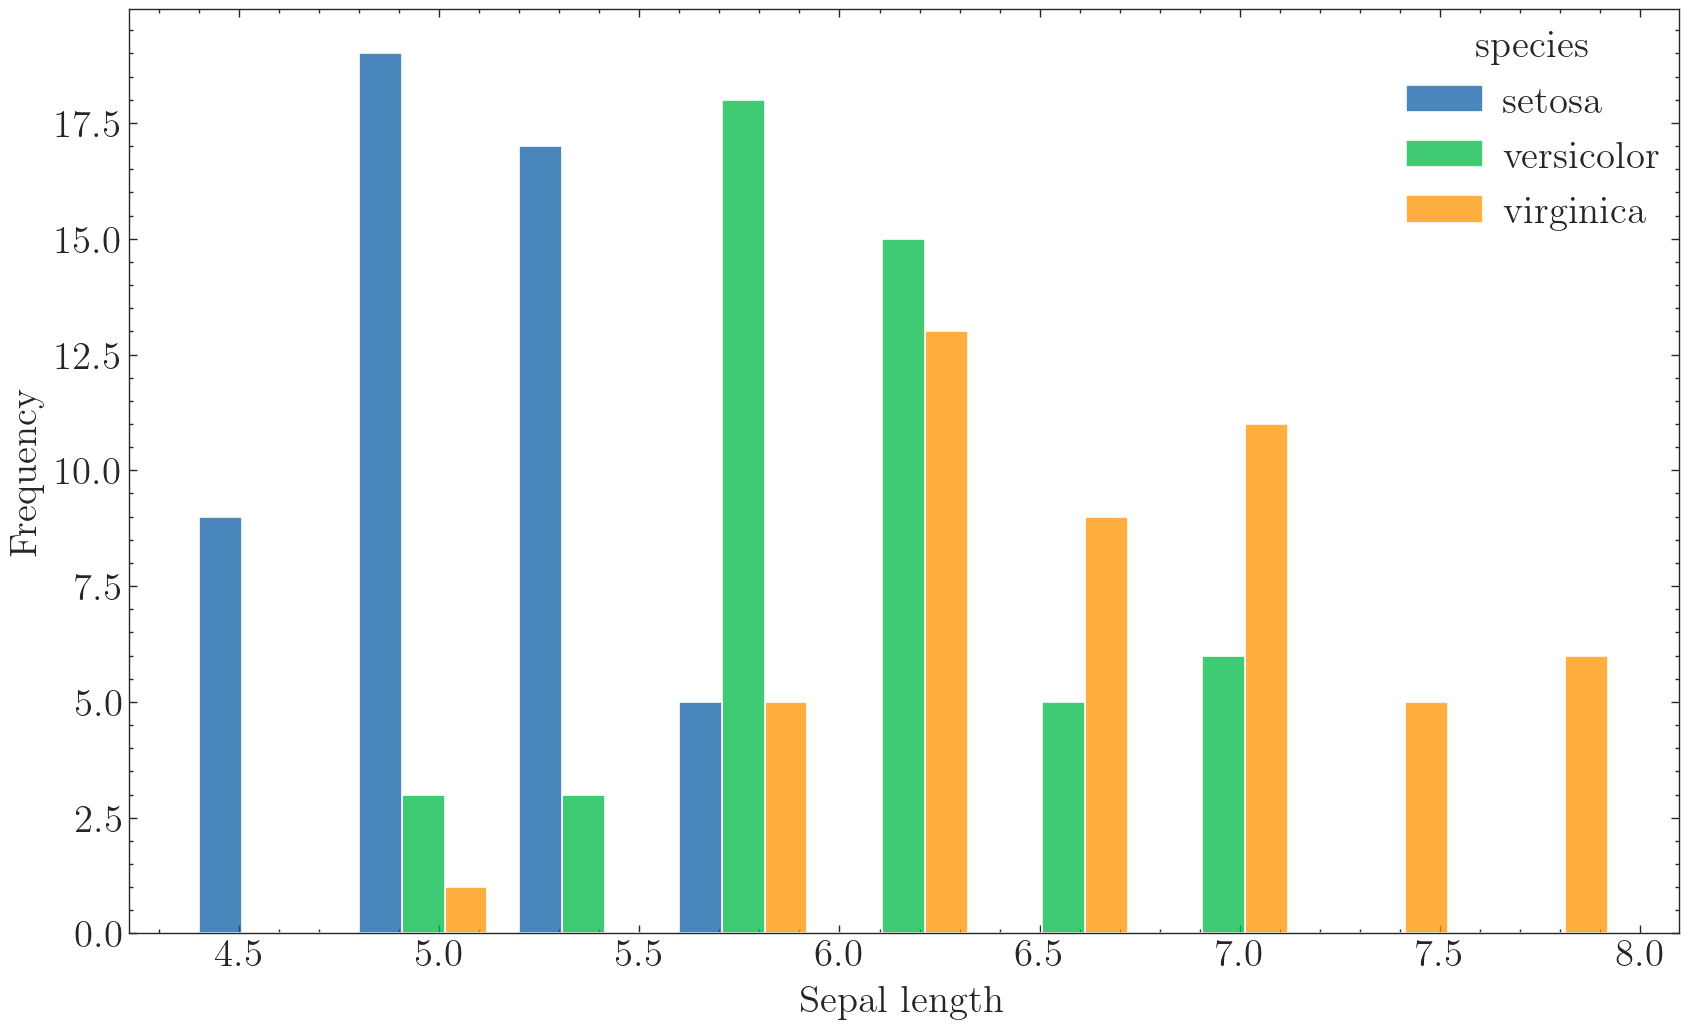

In [9]:
# plt.style.use('science')
with plt.style.context(['science']):
    fig, ax = plt.subplots(figsize=(10,6),dpi=100,facecolor="w")
    sns.histplot(data=iris, x="sepal_length", hue='species', multiple='dodge', shrink=.8)
    ax.set(xlabel='Sepal length', ylabel='Frequency')     
    ax.set_xlim(4, 8)
    ax.set_ylim(0, 30)        
    ax.autoscale(tight=False)   

    plt.savefig('./images/Hist_seaborn_SciencePlots1.png', dpi=300, bbox_inches='tight')
    plt.show()

也挺好看的，但是要注意，`SciencePlots`在这里必须得和返回对象为`matplotlib.axes.Axes`的画图函数配合使用，不然会报错。

<Figure size 1000x600 with 0 Axes>

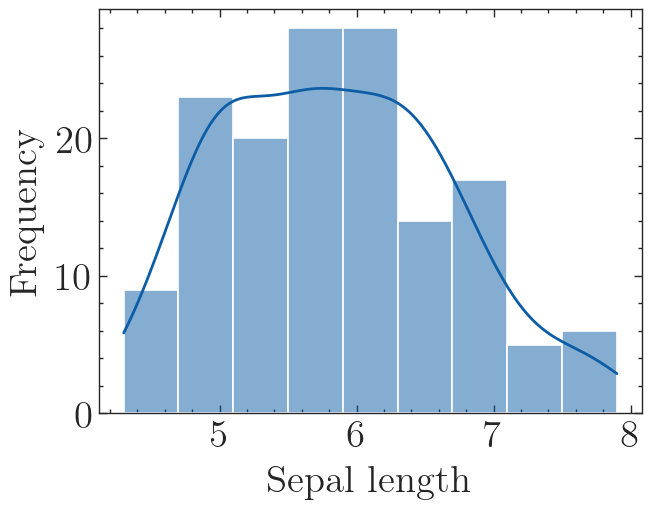

In [10]:
plt.style.use('science')

# with plt.style.context(['science']):
plt.figure(figsize=(10, 6), dpi=100)
fig, ax = plt.subplots()        
sns.histplot(data=iris, x="sepal_length", kde=True)        
ax.set(xlabel='Sepal length', ylabel='Frequency')     
ax.set_xlim(4, 8)
ax.set_ylim(0, 30)        
ax.autoscale(tight=False)     

plt.savefig('./images/Hist_seaborn_SciencePlots2.png', dpi=300, bbox_inches='tight')
plt.show()

## <a id='toc1_2_'></a>[3.2 密度图](#toc0_)
密度图可以查看分布情况，也可以用于比较两组数据的分布情况。
画密度图的方法有很多，常用的方法为Seaborn的kdeplot，或者Seaborn的`histplot` + `kde=True`。这里展示一个简单的例子：

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import proplot as pplt
import scienceplots

plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size']   = 14

In [12]:
iris = sns.load_dataset("iris")

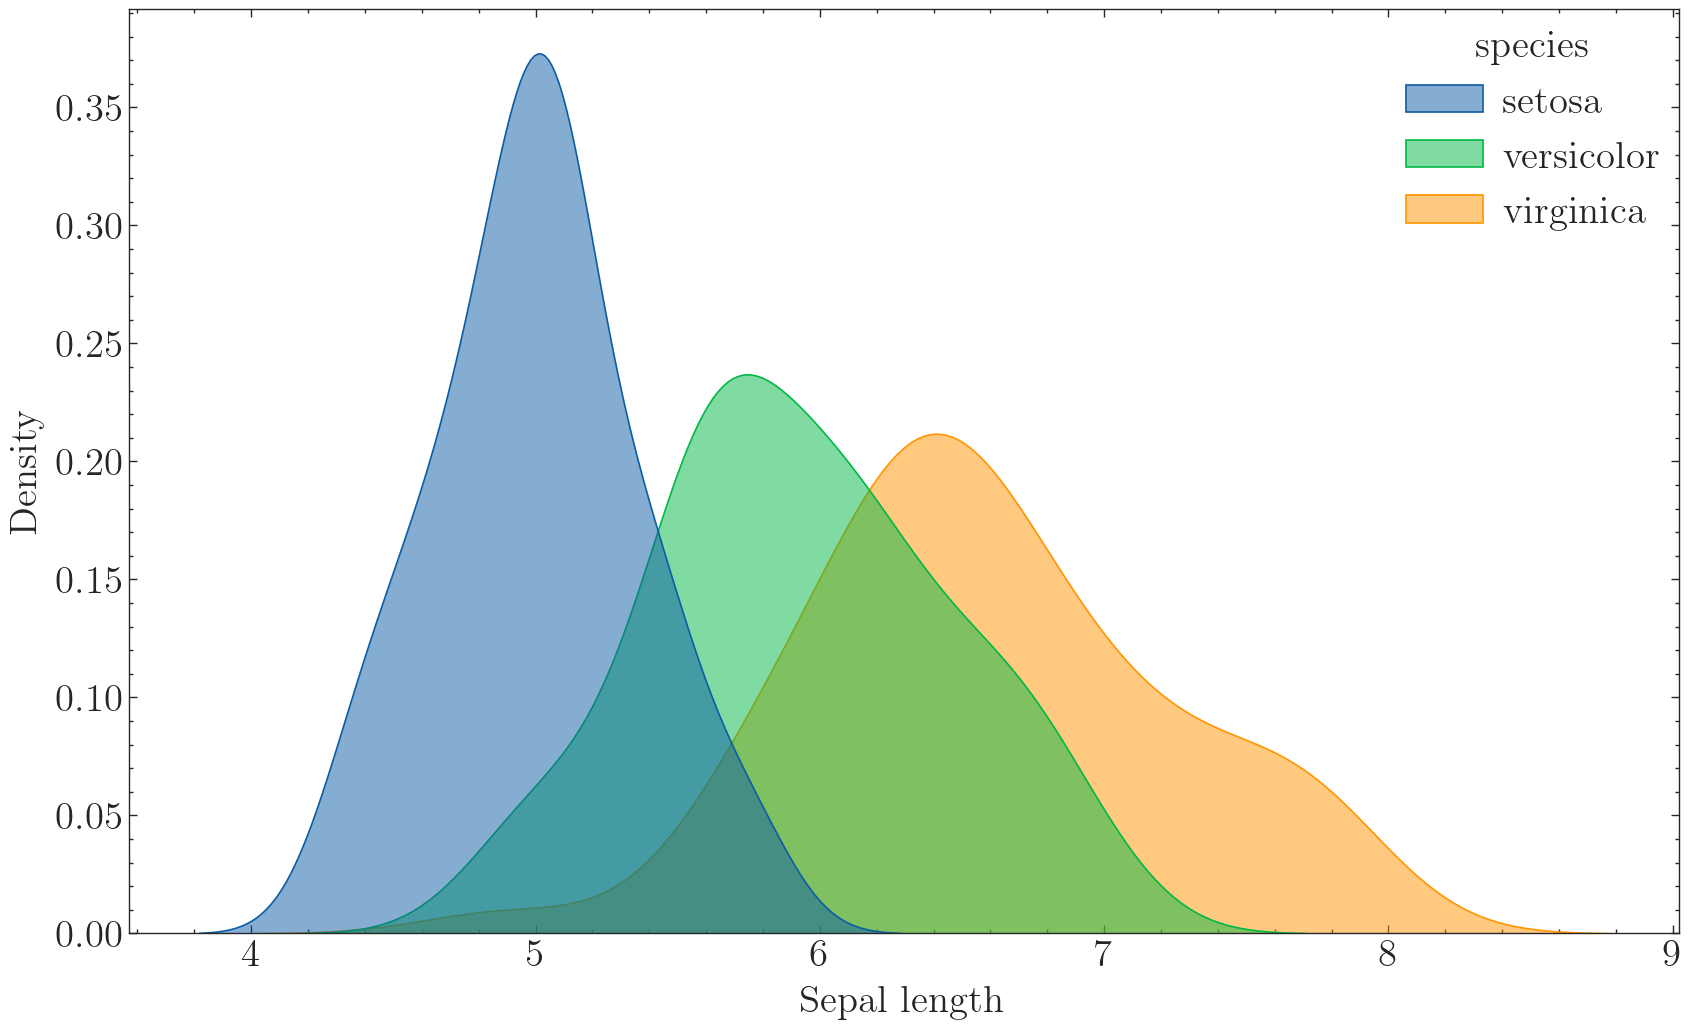

In [13]:
with plt.style.context(['science']):
    fig, ax  = plt.subplots(figsize=(10,6), dpi=100, facecolor="w")
    # hist = ax.hist(x=iris['sepal_length'], bins=bins,color='#5698c3',
    #                edgecolor='w',rwidth = 0.8)
    ax = sns.kdeplot(data=iris, x='sepal_length', hue='species', fill=True, alpha=.5)

    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Density')

plt.savefig('./images/Kdeplot_Seaborn.png', dpi=300, bbox_inches='tight')
plt.show()

可以非常明显地看出不同种类的鸢尾花的萼片长度分布情况，平均长度：$setosa < versicolor < virginaca$。

注意，Seaborn的`kdeplot`函数默认采用的是高斯核函数，如果想要用其他核函数的话可以参考`KDEpy`库。（一般高斯核也够用了）

## <a id='toc1_3_'></a>[3.3 常用函数封装](#toc0_)
需要用到分布函数的情况有：数据探索阶段、验证阶段（验证测试集分布与训练集分布是否差异过大）等。那么，我们可以封装一些常用的分布函数，把画图、调参、存储这些琐碎但重要的细节都封装好，以后调用只需输入几个参数，减少花在调整细节上的时间。

PS：科研论文绘图更多时候需要的是“定制化”，很难一个模板走天下，这个时候建议大家直接看matplotlib或者Seaborn等的官方文档，有更加详细的参数解释和例子，这里就不多介绍了。

### <a id='toc1_3_1_'></a>[3.3.1 单变量分布图](#toc0_)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import pandas as pd
from pandas import DataFrame

# plt.rcParams['font.family'] = 'Times New Roman'
# plt.rcParams['font.size']   = 14

def univariate_histplot(data:DataFrame, x:str, hue=None, figsize=(10,6), style=['science'], kde=True, kind='hist',
                        plot_dpi=100, saveflag=False, save_dir='./', save_dpi=300, save_type='png'):
    """
    单变量直方图函数。第一次画的
    
    Args:
    data: Dataframe, 必需参数，且必须为DataFrame。
    x: 变量名，str, 必需参数。
    hue: 分组的变量名，str, 一般为类别，如性别、种类等。默认为空。
    figsize: 图片尺寸，默认为(10, 6)。
    style: list, 画图的风格，默认为['science']，可以改为['science', 'ieee']
    kde: bool, 是否添加核密度估计曲线，默认为True.
    kind: str, 图像类型，hist为直方图，kde为密度图。
    plot_dpi: int, 画图时的dpi。
    saveflag: bool, 是否保存图片，默认为False。
    save_dir: str, 保存路径。
    save_dpi: int, 保存的图片dpi，越高越清晰，图片所占空间也就越大。
    save_type: str, 保存的图片类型，默认为'png'.
    
    """

    if not isinstance(data, DataFrame):
        raise TypeError("Input 'data' must be a pandas DataFrame")

    cols = data.columns
    if x not in cols:
        raise ValueError("Input 'x' must be a column name in data")
    if hue and hue not in cols:
        raise ValueError("Input 'hue' must be a column name in data")
    if not save_dir.endswith('/'):
        save_dir = save_dir + '/'
    if kind not in ['hist', 'kde']:
        raise ValueError("Input 'kind' must be 'hist' or 'kde'")
    
    with plt.style.context(style):
        fig, ax = plt.subplots(figsize=figsize, dpi=plot_dpi, facecolor="w")
        if hue and kind == 'hist':
            ax = sns.histplot(data=data, x=x, hue=hue, multiple='dodge', shrink=.8)
        elif hue and kind == 'kde':
            ax = sns.kdeplot(data=data, x=x, hue=hue, fill=True, alpha=.5)
        else:
            ax = sns.histplot(data=data, x=x, kde=kde)

        ax.set_xlabel('Values') # 画完图后不能再有参数出现
        if kind == 'hist':
            ax.set_ylabel('Frequency')  
        else:
            ax.set_ylabel('Density')

        if saveflag:
            if hue:
                save_path = save_dir + kind + x + '_' + hue + '_' + style[-1] + '.' + save_type
            else:
                save_path = save_dir + kind + x + '_' + style[-1] + '.' + save_type
            plt.savefig(save_path, dpi=save_dpi, bbox_inches='tight')
            print(f'Plot has been saved to {save_path} .')

        plt.show()

来测试一下：

Plot has been saved to ./images/histsepal_length_science.png .


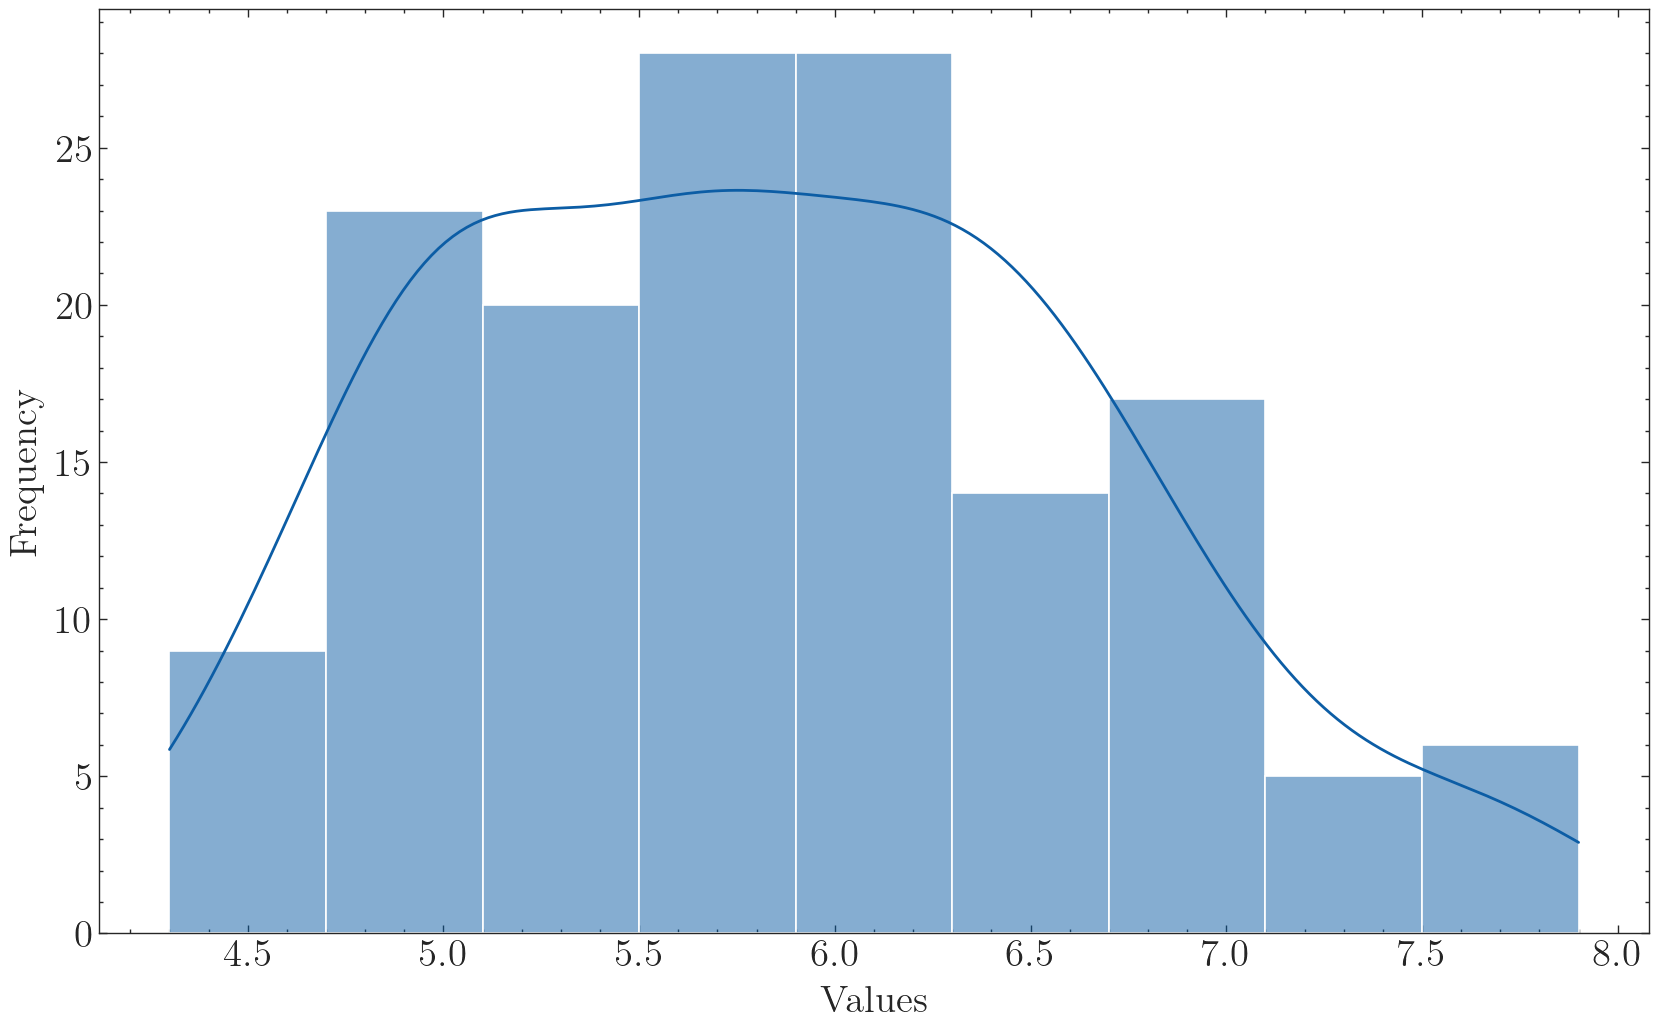

In [15]:
univariate_histplot(iris, x='sepal_length', saveflag=True, save_dir='./images/')

Plot has been saved to ./images/histsepal_length_species_science.png .


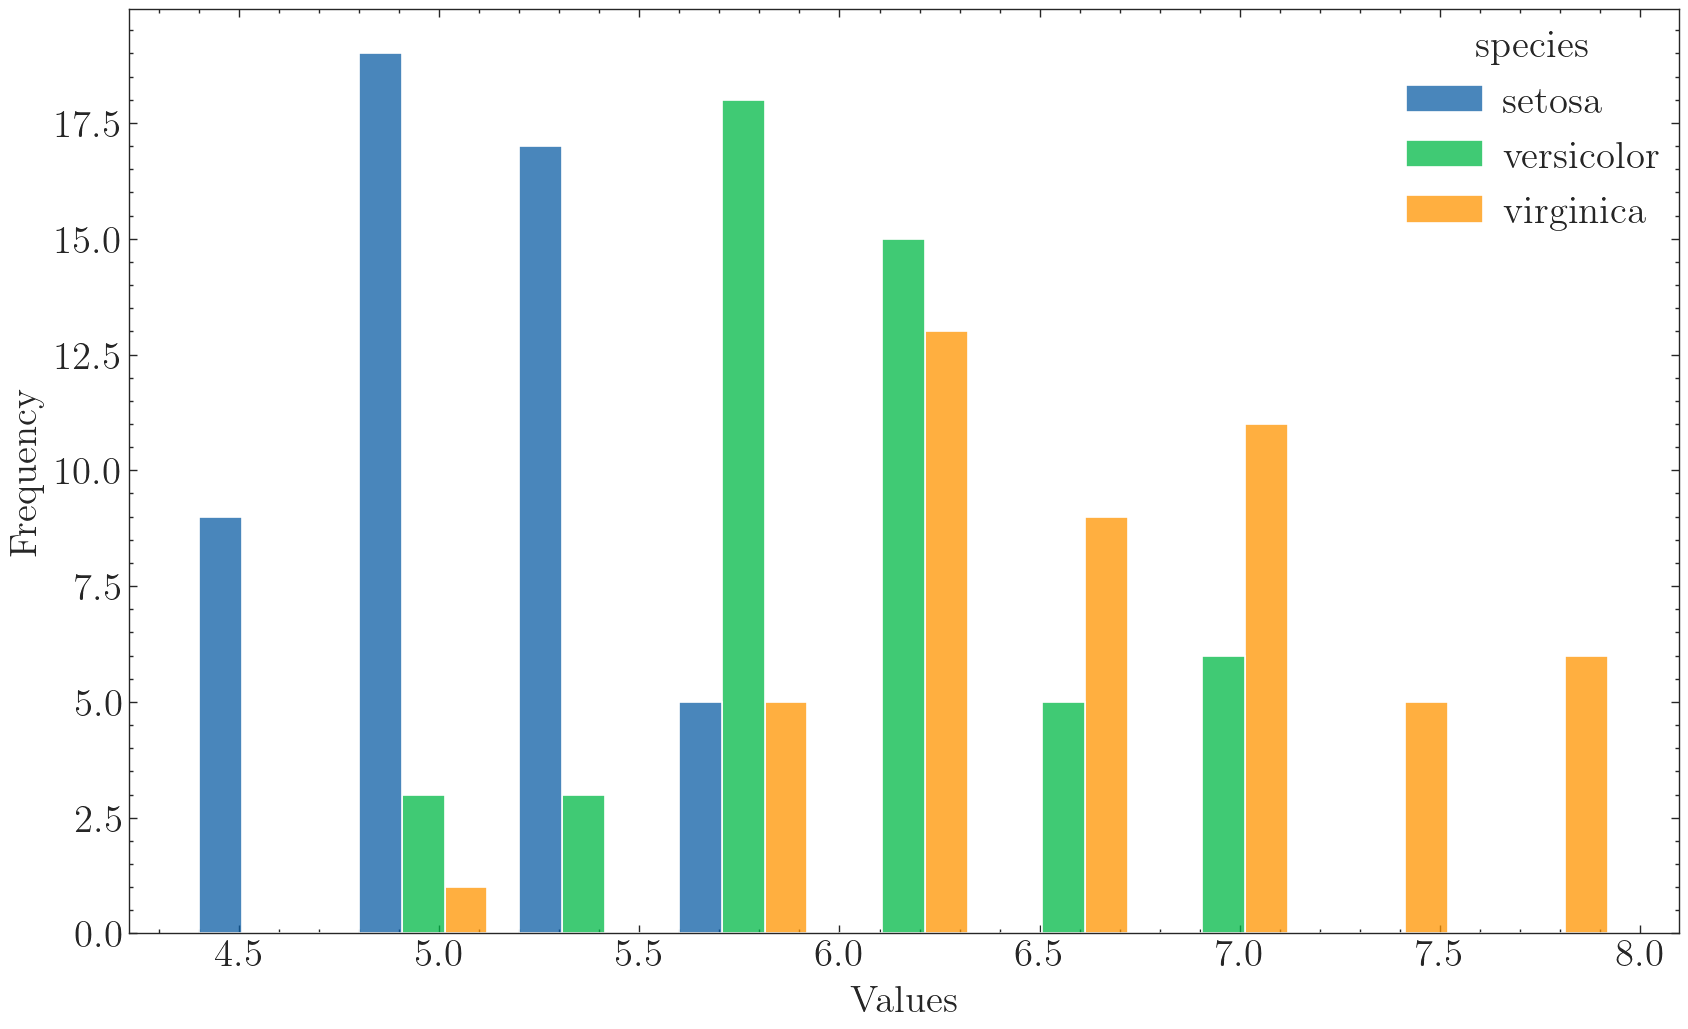

In [16]:
univariate_histplot(iris, x='sepal_length', hue='species', saveflag=True, save_dir='./images')

Plot has been saved to ./images/kdesepal_length_species_science.png .


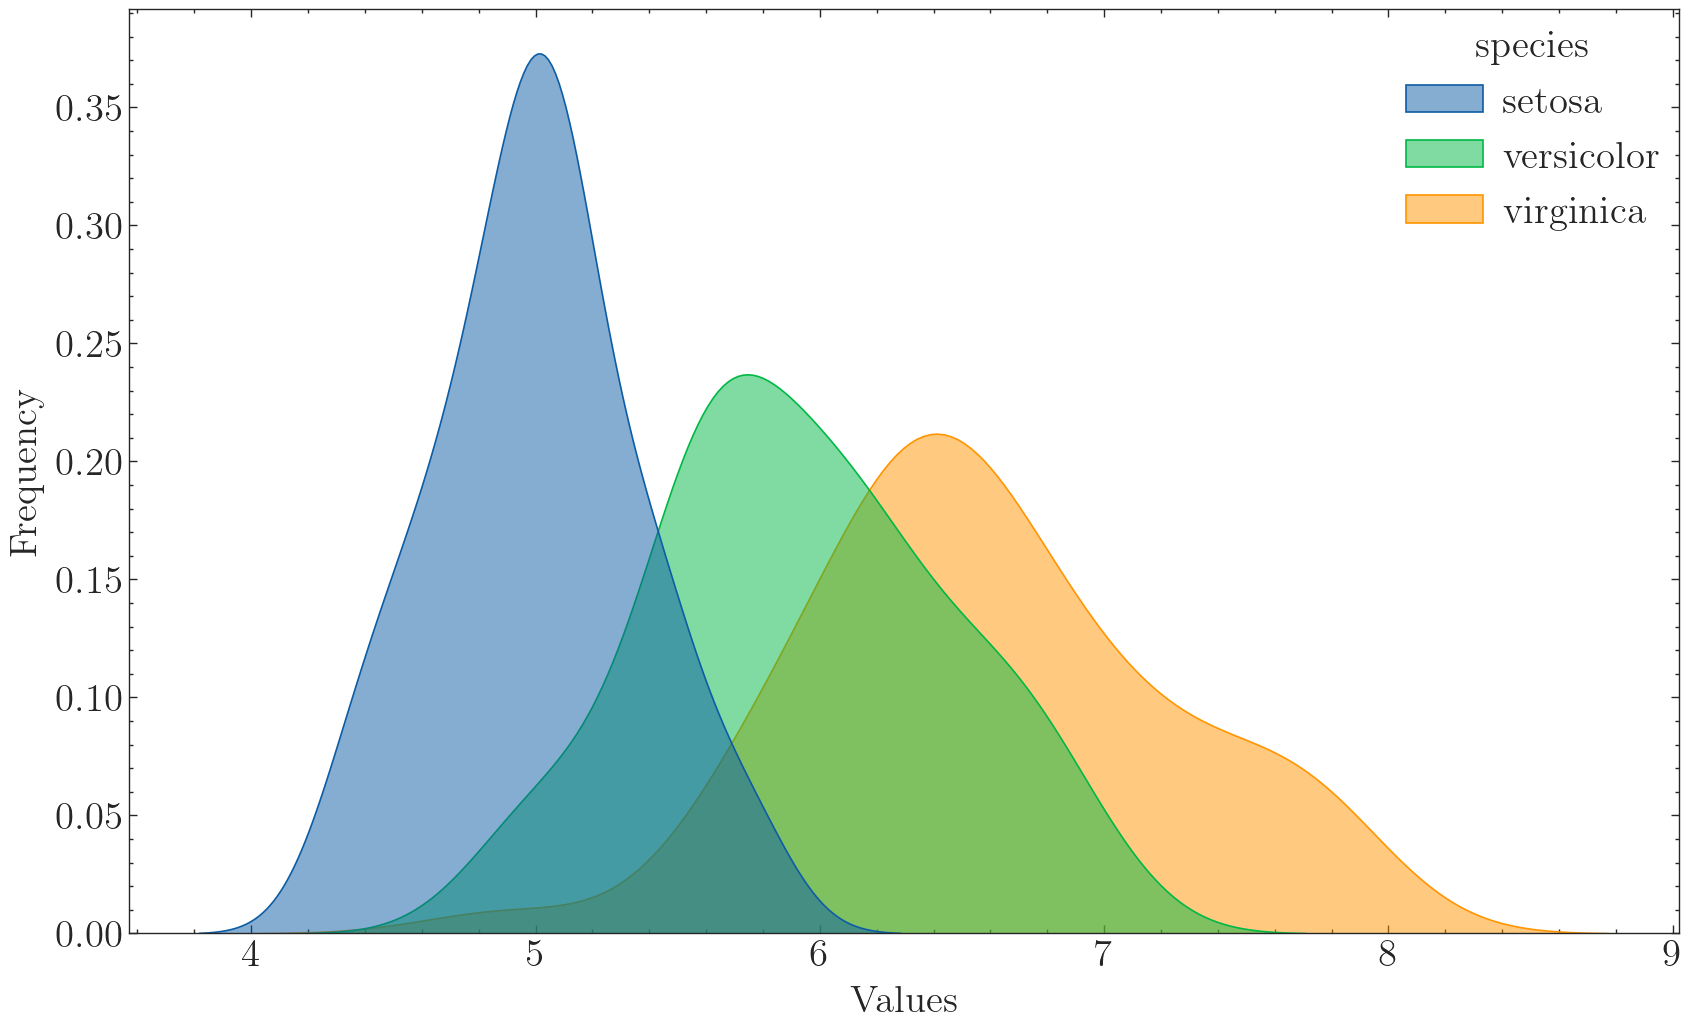

In [17]:
univariate_histplot(iris, x='sepal_length', hue='species', kind='kde', saveflag=True, save_dir='./images')

OK，3种模式都很成功。

### <a id='toc1_3_2_'></a>[3.3.2 多变量分布图](#toc0_)
接下来我们来画多个变量的分布图，先从2个到多个变量。这种图的作用一般在于看多个变量之间的相关性如何（启示我们要选择数值型变量，文本型变量需要进行转换数据类型）。

- 2个变量

    对于两个变量的之间的分布图，可以用seaborn的`jointplot`函数，它默认画的是散点图，但是可以指定kind参数。

<Figure size 1500x1500 with 0 Axes>

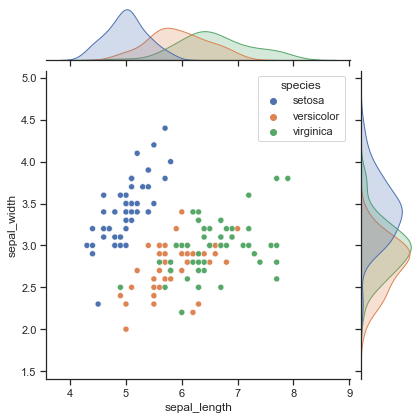

In [2]:
# 这里需要重启一下jupyter内核
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')
sns.set_theme(style="ticks")
# plt.style.reload_library()
# plt.style.use('grid')

plt.figure(figsize=(15, 15), dpi=100, facecolor='w')
sns.jointplot(data=iris,x="sepal_length", hue='species', y="sepal_width")

plt.savefig('./images/Seaborn_jointplot.png', dpi=300, bbox_inches='tight')
plt.show()

好消息：图很好看。

坏消息：由于`jointplot`返回的不是`axes`对象，用不了`SciencePlots`那严谨的绘图风格。

再来画个蜂窝图：

<Figure size 1500x1500 with 0 Axes>

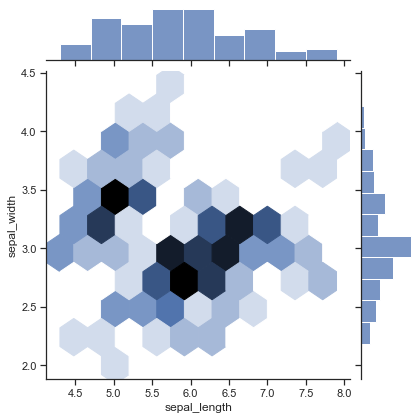

In [4]:
plt.figure(figsize=(15, 15), dpi=100, facecolor='w')
sns.jointplot(data=iris, x="sepal_length", y="sepal_width", kind='hex')

plt.savefig('./images/Seaborn_jointplot_hex.png', dpi=300, bbox_inches='tight')
plt.show()

蜂窝图中颜色越深的地方说明该区域的样本数量多，分布越集中。

更多`jointplot`函数的用法参见[Seaborn官方文档：jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot)。

- 多个变量
    当变量个数较多时，推荐使用Seaborn的`pairplot`和`heatmap`函数。

    先来看看pairplot：

<Figure size 1800x1500 with 0 Axes>

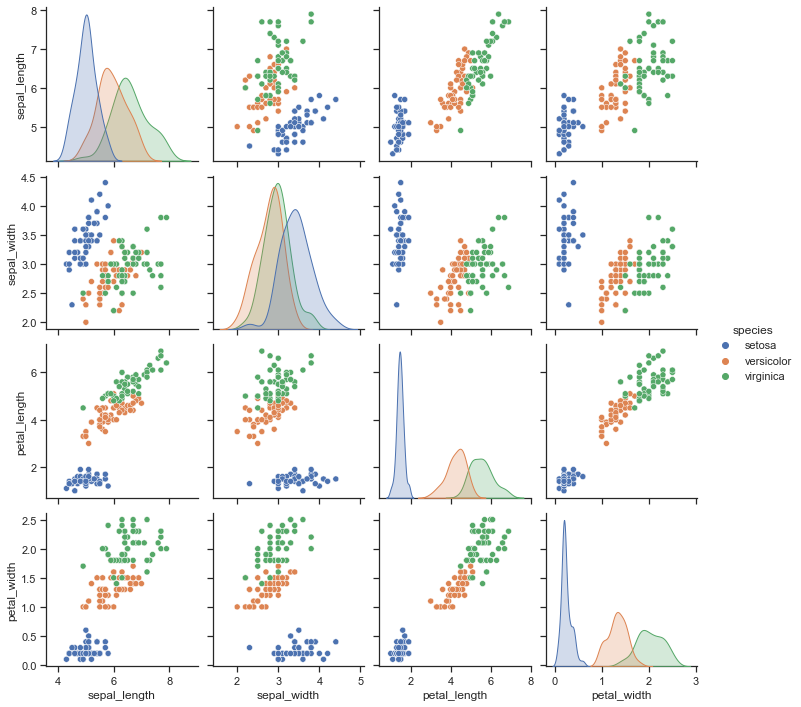

In [5]:
plt.figure(figsize=(18, 15), dpi=100, facecolor='w')
sns.pairplot(iris, hue="species")
plt.savefig('./images/Seaborn_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

emmmm, `pairplot`这个函数返回的是`PairGrid`对象，不是`matplotlib.axes.Axes`对象，还是没法用`SciencePlots`。不过这个函数已经封装地很好了，一行代码搞定，就不再封装了~

再来看看热力图函数`heatmap`：

In [6]:
# 计算相关系数二维矩阵
corr = iris.corr()
corr

<ipython-input-6-c5cd6f9fda0c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


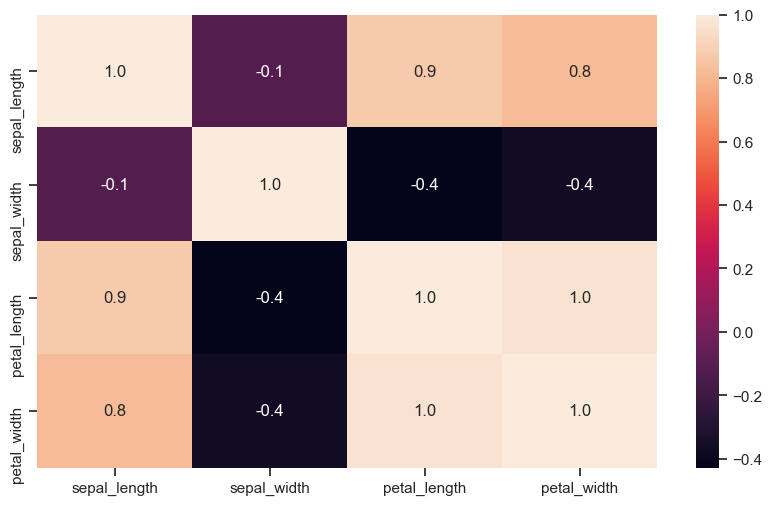

In [7]:
plt.figure(figsize=(10, 6), dpi=100, facecolor='w')
sns.heatmap(corr, annot=True, fmt=".1f")
plt.savefig('./images/Seaborn_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

太丑了，换个颜色。

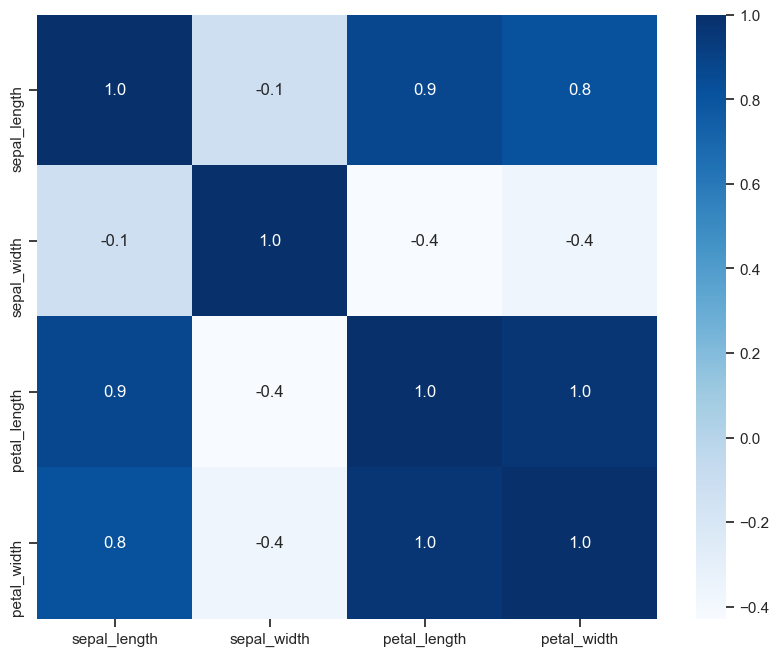

In [8]:
plt.figure(figsize=(10, 8), dpi=100, facecolor='w')
sns.heatmap(corr, annot=True, fmt=".1f", cmap='Blues')
plt.savefig('./images/Seaborn_heatmap2.png', dpi=300, bbox_inches='tight')
plt.show()

优雅，实在是太优雅了！

这个热力图能用`SciencePlots`，但是不太推荐，刻度线太细了，看着反而有点奇怪，不如直接设置Seaborn的风格参数。

## <a id='toc1_4_'></a>[参考资料：<br>](#toc0_)
[1] [《Datawhale 科研论文配图绘制指南--基于Python》](https://github.com/datawhalechina/paper-chart-tutorial)<br>
[2] [matplotlib 官方文档](https://matplotlib.org/stable/tutorials/index) <br>
[3] [Seaborn 官方文档](https://seaborn.pydata.org/) <br>
[4] [Pandas 官方文档](https://pandas.pydata.org/docs/user_guide/reshaping.html#pivot)